Notebook correspondant à la section 2.3 du rapport.
Implémentation de résolution numérique approchée de l'équation :
$\frac{dM}{dt} = f(t,M), 
M(0) = M_0$
à l'aide d'un réseau de neurones avec une couche cachée et des
fonctions d'activation sigmoid

In [485]:
#imports
from numpy import pi, cos, sin, dot, zeros, linspace, sum, array, arange, concatenate, exp, log
from numpy import sum as np_sum
from numpy.random import randn
from numpy import math
from matplotlib.pyplot import plot, legend, title, show

Données du problème

In [497]:
#bornes de l'intervalle
t_a = -1
t_b = 1

W=2*pi

#condition initiale
M_0 = 0

#fonction définissant l'équation différentielle
def f(t,M,W) :
    return -cos(W*t)

def df_dM(t,M,W) :
    """renvoie df/dM (t,M)"""
    return 0
    

Fonctions calculant respectivement la sortie du réseau de neurones, l'erreur, et le gradient de l'erreur

In [487]:
def M(Mat_T, M_0, A, H, N) :
    #Calcule la sortie du réseau de neurones
    return M_0 + array([dot(A, Mat_T[1:,i]) for i in range(N)])


def calcError(Mat_T, M_0, A, f, W, H, N) :
    #Calcule l'erreur
    E = 0

    for i in range(N):     
        M_i = M_0 + dot(A, Mat_T[1:,i])
        e = dot(arange(1, H+1)*A, Mat_T[:H,i]) - f(Mat_T[1,i], M_i,W)
        E += e**2
        #print(Mat_T[1,i], M_i, dot(arange(1, H+1)*A, Mat_T[:H,i]), f(Mat_T[1,i], M_i), e**2)
    return E/N


def calcGrad(Mat_T, M_0, A, f, df_dM,W, H, N) :
    #calcule le gradient de l'erreur par rapport
    grad = zeros(H)
    #print("Calcul gradient :")
    for i in range(N):  
        M_i = M_0 + dot(A, Mat_T[1:,i])
        e = dot(arange(1, H+1)*A, Mat_T[:H,i]) - f(Mat_T[1,i], M_i,W)
        df = df_dM(Mat_T[1,i], M_i,W)
        de_dA = Mat_T[:H,i]*(arange(1, H+1)-Mat_T[1,i]*df)
        grad += 2*e*de_dA
        #print("i={}, t={}, M={}, M'={}".format(i,Mat_T[1,i], M_i, dot(arange(1, H+1)*A, Mat_T[:H,i])))
        #print("e={}, df={}, de_dA={}".format(e,df,de_dA))

    return grad/N


Définition des paramètres du modèle

In [501]:
N = 50 # nombre de points pour la variable indépendante
T = linspace(t_a,t_b,N) #liste des points de tests


H = 10 # nombre de termes de la série entière


Mat_T = array([T**k for k in range(H+1)])


#initialisation des paramètres
A = randn((H))
#A= array([1/math.factorial(n+1) for n in range(H)])
A = array([-1.23374933,  2.47684882 , 0.63980756 ,-0.27282095 ,-1.70583312, -1.5364002,
  0.92004351 , 0.7478014 , -0.27807095  ,0.24318266])


In [505]:
epochs = 50000 #nombre d'itérations
alpha = 5e-2 #taux d'apprentissage pour la descente de gradients

Entraînement du modèle

In [511]:
for k in range(epochs) :
    if (k%5000 == 0) :
        print("Erreur après",k,"itérations :", calcError(Mat_T, M_0, A, f,W, H, N))
    A -= alpha*calcGrad(Mat_T, M_0, A, f, df_dM,W, H, N)

Erreur après 0 itérations : 0.0008266663319436879
Erreur après 5000 itérations : 0.0007222530337009768
Erreur après 10000 itérations : 0.0006360944352223194
Erreur après 15000 itérations : 0.0005649772025410048
Erreur après 20000 itérations : 0.000506254580635502
Erreur après 25000 itérations : 0.0004577464531125105
Erreur après 30000 itérations : 0.0004176570323499303
Erreur après 35000 itérations : 0.0003845070698385468
Erreur après 40000 itérations : 0.000357078025157685
Erreur après 45000 itérations : 0.00033436608391920405


Affichage des résulats trouvés :

In [512]:
print()
print("Erreur finale après",epochs,"itérations",calcError(Mat_T, M_0, A, f, W, H, N))
print("paramètres trouvés :",A)

#save((w,b,v), 'H = '+str(H)+', E = '+str(int(calcError(w, b, v))))


Erreur finale après 50000 itérations 0.00031554428719063777
paramètres trouvés : [ -0.96926252  -0.02660061   6.11034387   0.17747952 -10.78467385
  -0.42905178   7.62003146   0.4325482   -1.97612967  -0.15486718]


Affichage graphique de la solution trouvée :

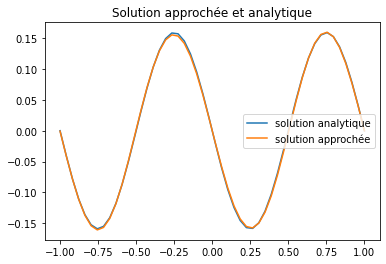

In [513]:
#solution trouvée
Y = M(Mat_T, M_0, A, H, N) 

#solution analytique
Z = [-sin(W*t)/W for t in Mat_T[1]]

plot(T,Z, label='solution analytique')
plot(T,Y, label='solution approchée')
legend()
title('Solution approchée et analytique')
show()